Studi kasus ini bertujuan untuk memprediksi puncak kasus dan akhir dari pandemi covid-19 di Indonesia

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit,fsolve

In [2]:
df = pd.read_csv ("covid_data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73991,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73992,ZWE,Africa,Zimbabwe,2021-03-07,36271.0,11.0,26.000,1485.0,0.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73993,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73994,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73996 entries, 0 to 73995
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               73996 non-null  object 
 1   continent                              70335 non-null  object 
 2   location                               73996 non-null  object 
 3   date                                   73996 non-null  object 
 4   total_cases                            72923 non-null  float64
 5   new_cases                              72921 non-null  float64
 6   new_cases_smoothed                     71920 non-null  float64
 7   total_deaths                           63734 non-null  float64
 8   new_deaths                             63892 non-null  float64
 9   new_deaths_smoothed                    71920 non-null  float64
 10  total_cases_per_million                72525 non-null  float64
 11  ne

In [14]:
df['location'].value_counts()

Argentina           435
Mexico              435
Thailand            432
Taiwan              420
South Korea         415
                   ... 
Falkland Islands     16
Montserrat           16
Macao                11
Northern Cyprus       9
Saint Helena          1
Name: location, Length: 215, dtype: int64

## Data Cleansing


In [12]:
df_indo = df.loc[df["location"]=="Indonesia"]
df_indo = df_indo.reset_index(drop=True)
df_indo

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
1,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
2,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
3,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
4,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,IDN,Asia,Indonesia,2021-03-06,1373836.0,5767.0,6394.571,37154.0,128.0,167.571,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
370,IDN,Asia,Indonesia,2021-03-07,1379662.0,5826.0,6432.571,37266.0,112.0,157.143,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
371,IDN,Asia,Indonesia,2021-03-08,1386556.0,6894.0,6463.143,37547.0,281.0,174.571,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
372,IDN,Asia,Indonesia,2021-03-09,1392945.0,6389.0,6559.857,37757.0,210.0,177.000,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718


In [17]:
df_indo = df_indo [["date","total_cases","new_cases","total_deaths","new_deaths"]]
df_indo

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-03-02,2.0,2.0,NaN,NaN
1,2020-03-03,2.0,0.0,NaN,NaN
2,2020-03-04,2.0,0.0,NaN,NaN
3,2020-03-05,2.0,0.0,NaN,NaN
4,2020-03-06,4.0,2.0,NaN,NaN
...,...,...,...,...,...
369,2021-03-06,1373836.0,5767.0,37154.0,128.0
370,2021-03-07,1379662.0,5826.0,37266.0,112.0
371,2021-03-08,1386556.0,6894.0,37547.0,281.0
372,2021-03-09,1392945.0,6389.0,37757.0,210.0


In [18]:
df_indo.isnull().sum()

date            0
total_cases     0
new_cases       0
total_deaths    9
new_deaths      9
dtype: int64

In [20]:
df_indo.fillna(0)

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-03-02,2.0,2.0,0.0,0.0
1,2020-03-03,2.0,0.0,0.0,0.0
2,2020-03-04,2.0,0.0,0.0,0.0
3,2020-03-05,2.0,0.0,0.0,0.0
4,2020-03-06,4.0,2.0,0.0,0.0
...,...,...,...,...,...
369,2021-03-06,1373836.0,5767.0,37154.0,128.0
370,2021-03-07,1379662.0,5826.0,37266.0,112.0
371,2021-03-08,1386556.0,6894.0,37547.0,281.0
372,2021-03-09,1392945.0,6389.0,37757.0,210.0


## EDA

<function matplotlib.pyplot.show(close=None, block=None)>

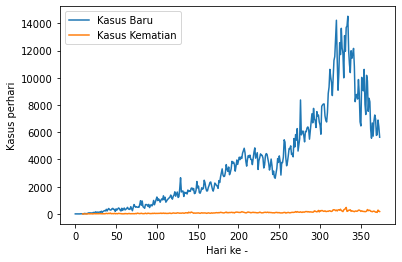

In [23]:
df_indo["new_cases"].plot(label="Kasus Baru")
df_indo["new_deaths"].plot(label="Kasus Kematian")
plt.xlabel ("Hari ke -")
plt.ylabel ("Kasus perhari")
plt.legend (loc="best")
plt.show

In [39]:
for i in range (len(df_indo)):
    if df_indo ["new_cases"].iloc[i]==df_indo["new_cases"].max():
        print("Tanggal Kasus Positif Tertinggi{}".format(df_indo["date"].iloc[i]))
        print("Dengan jumlah {}".format(df_indo["new_cases"].iloc[i]))
        break

Tanggal Kasus Positif Tertinggi2021-01-30
Dengan jumlah 14518.0


<function matplotlib.pyplot.show(close=None, block=None)>

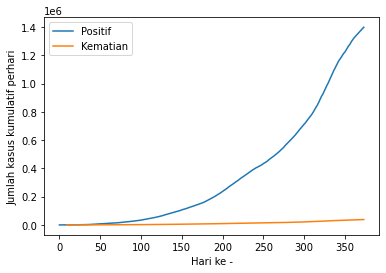

In [40]:
#Kasus Kumulatif

df_indo["total_cases"].plot(label="Positif")
df_indo["total_deaths"].plot(label="Kematian")
plt.xlabel ("Hari ke -")
plt.ylabel ("Jumlah kasus kumulatif perhari")
plt.legend (loc="best")
plt.show

## Model Prediksi

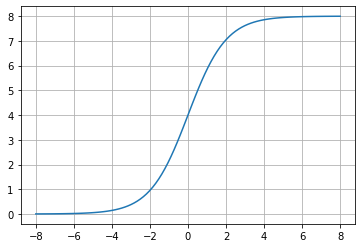

In [62]:
puncak = 8
x = np.linspace(-8,8,100)
y = puncak/(1+np.exp(-x))
plt.plot(x,y,label="Sigmoid")
plt.grid()
plt.show()

In [70]:
def kurva_sigmoid (t,a,t0,c) : 
    return c/(1+np.exp(-(t-t0)/(a)))

In [71]:
x = list (df_indo.index)
y = list (df_indo["total_cases"])

In [72]:
fit = curve_fit(kurva_sigmoid,x,y,method="trf")

var1,var2=fit

In [73]:
var1

array([6.91349102e+01, 3.71790368e+02, 2.84762097e+06])

In [74]:
var2

array([[5.78357901e-01, 2.65321465e+00, 5.86827594e+04],
       [2.65321465e+00, 1.35934519e+01, 3.06831421e+05],
       [5.86827594e+04, 3.06831421e+05, 6.98094037e+09]])

In [75]:
std_er = np.zeros(len(var1))
for i in range (len(var1)):
    std_er[i] = np.sqrt (var2[i][i])


In [76]:
std_er

array([7.60498456e-01, 3.68692987e+00, 8.35520219e+04])

In [77]:
a = var1[0]+std_er[0]
t0= var1[1]+std_er[1]
c = var1[2]+std_er[2]

In [78]:
def puncak(x):
    return kurva_sigmoid(x,a,t0,c)-int(c)

In [79]:
n_puncak = int(fsolve(puncak,t0))

In [80]:
print("Hari puncak covid-19 di indonesia ada di hari ke-"+str(n_puncak))

Hari puncak covid-19 di indonesia ada di hari ke-1416


## Analysis

In [86]:
n_0 = max(x)+1
pred_x = list(range(n_0,n_puncak))

print("Kita memiliki {} Hari menuju puncak wabak".format(str(len(pred_x))))

Kita memiliki 1042 Hari menuju puncak wabak


In [87]:
pred_y = np.zeros(len(x + pred_x))
for i in range (n_puncak) : 
    pred_y [i]=kurva_sigmoid(i,a,t0,c)
    
print ("Prediksi korban puncak covid adalah {} jiwa".format(int(pred_y[-1])))

Prediksi korban puncak covid adalah 2931171 jiwa


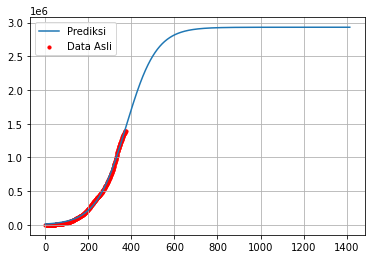

In [89]:
plt.plot(x+pred_x,pred_y,label="Prediksi")
plt.scatter(x,y,label="Data Asli",s=10,color="Red")
plt.xlabel = "Hari ke"
plt.ylabel = "Jumlah kasus kumulatif positif"
plt.grid()
plt.legend(loc="best")
plt.show()

## Akurasi

#### R2 Skor

In [90]:
def akurasi_r2 (y_asli,y_prediksi,x) : 
    atas=sum((y_asli-y_prediksi[0:len(x)])**2)
    bawah=sum((y_asli-np.mean(y))**2)
    r=1-(atas/bawah)
    return r

In [91]:
akur = akurasi_r2 (y,pred_y,x)

In [92]:
akur*100

99.74352003621533

In [93]:
from datetime import datetime, timedelta

In [94]:
df_indo

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-03-02,2.0,2.0,NaN,NaN
1,2020-03-03,2.0,0.0,NaN,NaN
2,2020-03-04,2.0,0.0,NaN,NaN
3,2020-03-05,2.0,0.0,NaN,NaN
4,2020-03-06,4.0,2.0,NaN,NaN
...,...,...,...,...,...
369,2021-03-06,1373836.0,5767.0,37154.0,128.0
370,2021-03-07,1379662.0,5826.0,37266.0,112.0
371,2021-03-08,1386556.0,6894.0,37547.0,281.0
372,2021-03-09,1392945.0,6389.0,37757.0,210.0


In [104]:
fmt = "%Y-%m-%d"
n1 = df_indo["date"][0]
tgl_0 = datetime.strptime(n1,fmt)
print(tgl_0 )

2020-03-02 00:00:00


In [106]:
type(tgl_0) , type(df_indo["date"][0])

(datetime.datetime, str)